In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/CreditCardFile.csv")
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [ ]:
data.shape

(6362620, 11)

Columns in dataset
step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig: customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrig: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recipient before the transaction

newbalanceDest: the new balance of recipient after the transaction

isFraud: fraud transaction

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Checking for missing values

In [ ]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


There are no missing values!
### Checking values for few columns

In [ ]:
data.nameOrig.value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [ ]:
data.nameDest.value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [ ]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [ ]:
data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [ ]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
# Exploring transaction type
print(data.type.value_counts())


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


## Exploratory Analysis and Visualization
### Univariate Analysis


Univariate analysis is used to analyze the data of single variable. 

 we will analyze using histplot






In [ ]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

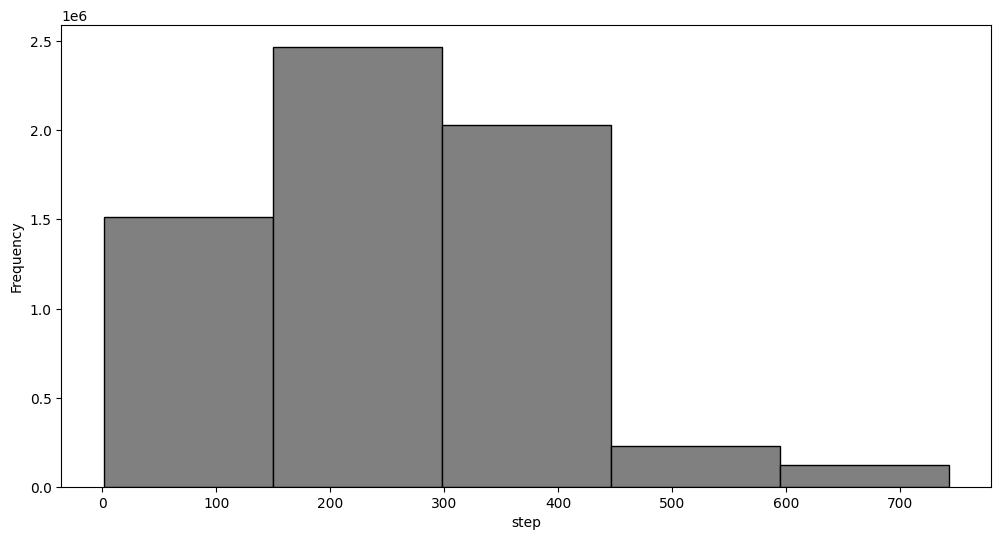

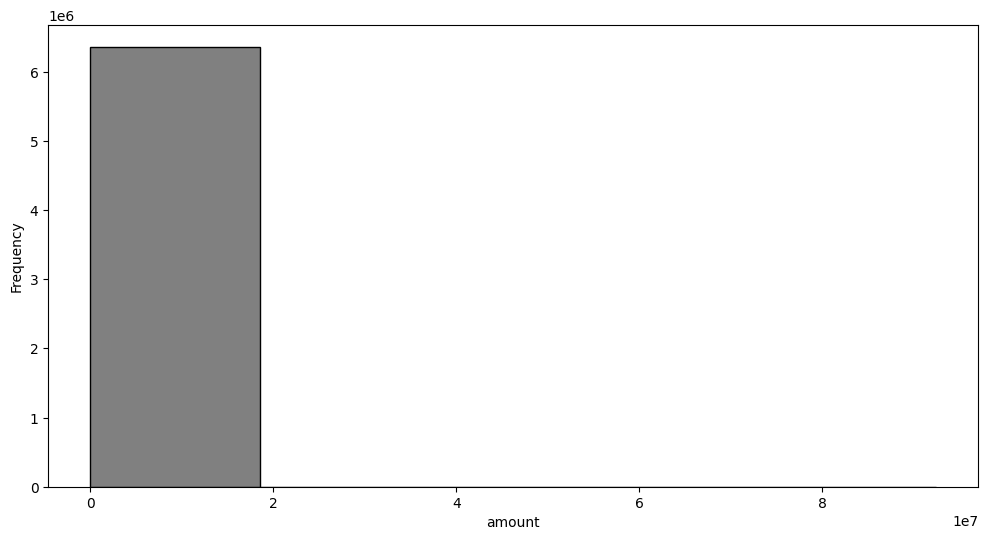

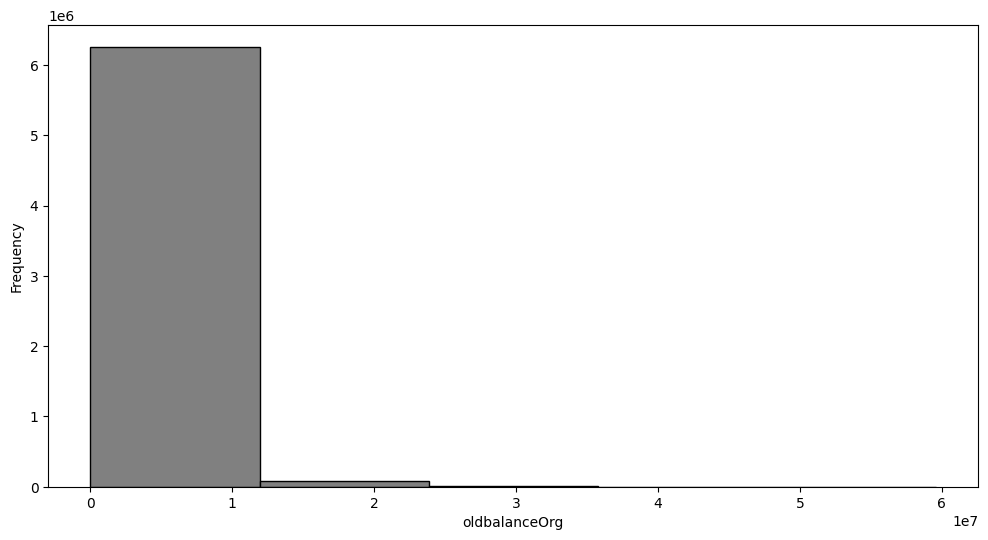

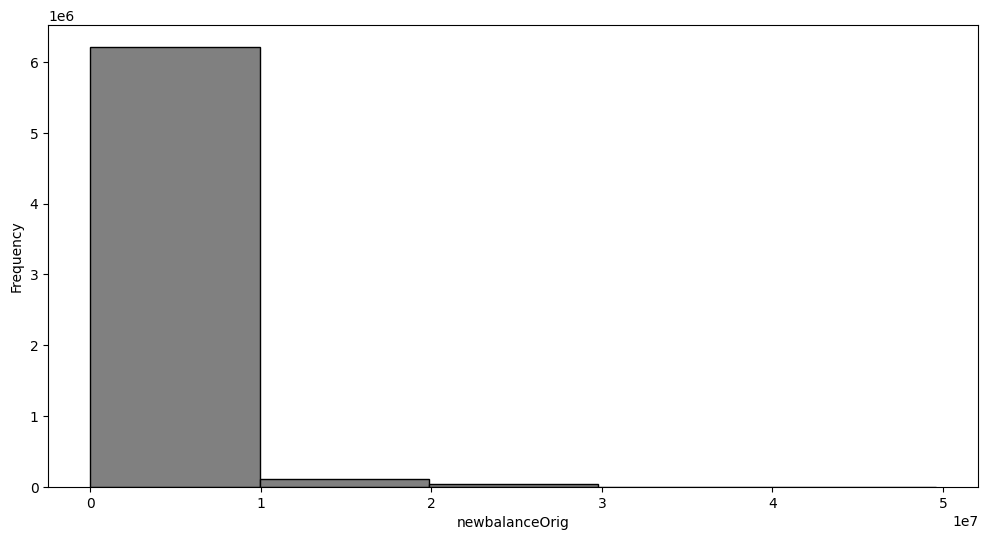

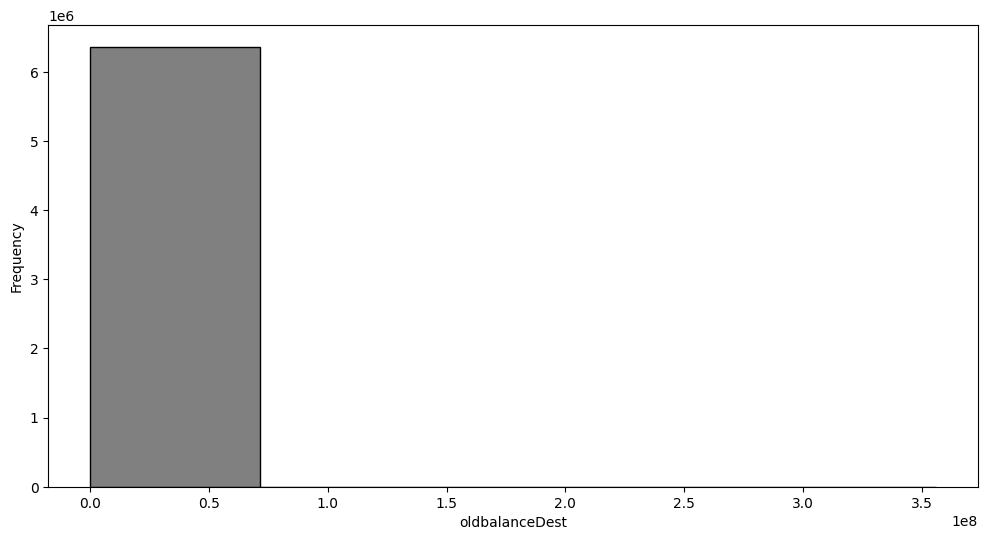

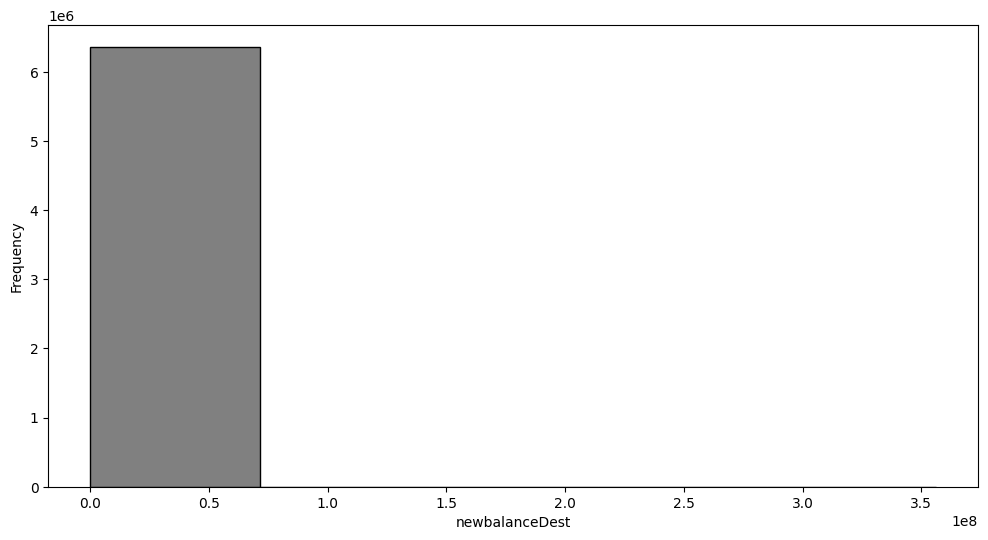

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

We could see some outliers in the plots. So let's work on it!

We'll use Quantile-based Flooring and Capping for these columns!

Capping is replacing all higher side values exceeding a certain theoretical maximum or upper control limit (UCL) by the UCL value. Here we'll do 90th percentile for higher values.

Flooring is replacing all values falling below a certain theoretical minimum or lower control limit (UCL) by the LCL value. Here we'll do 90th percentile for higher values.

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    print(i)
    print(data[i].quantile(0.10))
    print(data[i].quantile(0.90))

    print('\n')

amount
4501.3
365423.30900000007


oldbalanceOrg
0.0
1822508.289000007


newbalanceOrig
0.0
1970344.7930000005


oldbalanceDest
0.0
2914266.6690000016


newbalanceDest
0.0
3194869.671000002




Now we'll remove the outlier

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = data[i].quantile(0.10)
    upper = data[i].quantile(0.90)
    data[i] = np.where(data[i] <lower, lower,data[i])
    data[i] = np.where(data[i] >upper, upper,data[i])
    print('Feature: ',i)
    print('Skewness value: ',data[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




Now we'll take a look at it after removing outliers

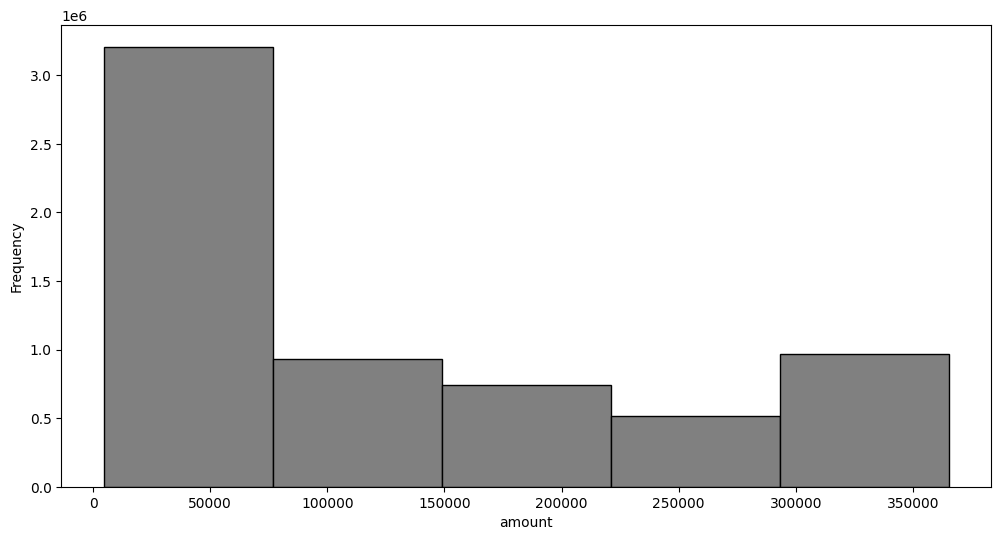

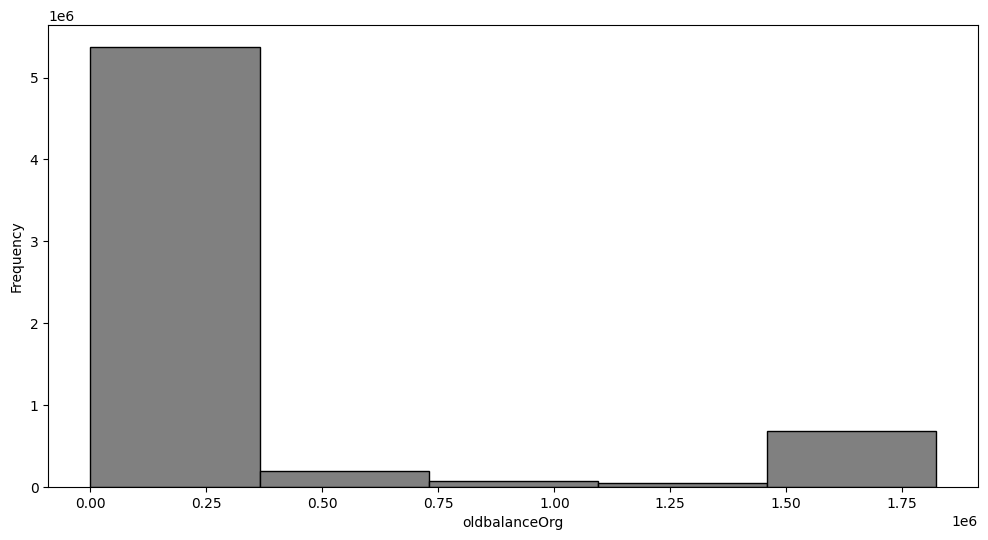

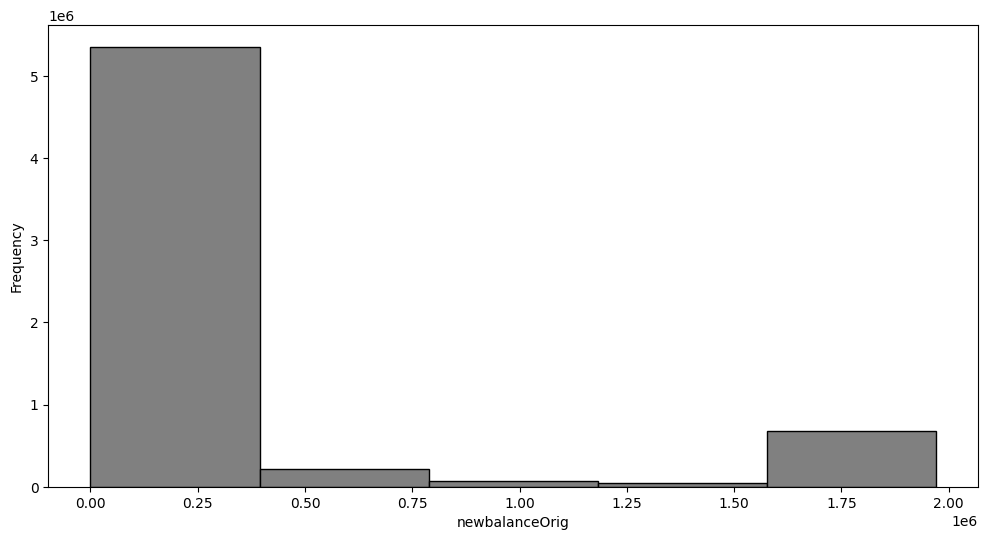

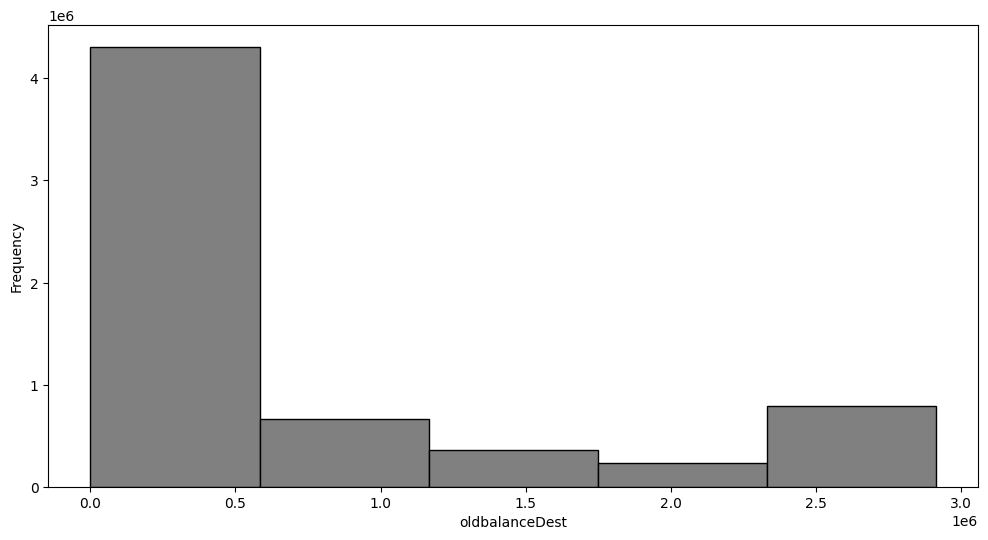

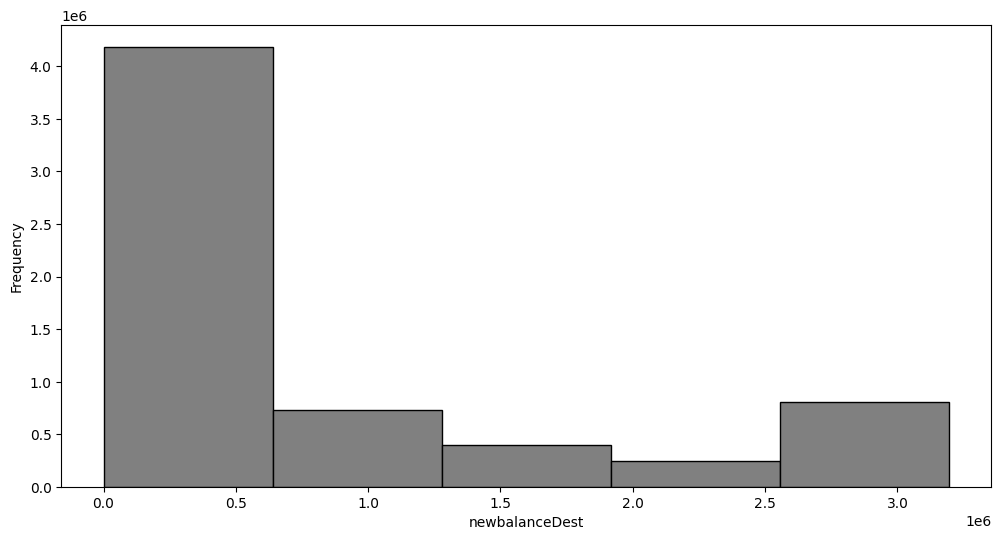

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

We have a maximum set of distribution between 150 to 400 of step
After outlier treatment



Amount ranges between 0-35 lakhs with more values ranging between 0-75,000. We'll analyze further in the upcoming sections.
OldbalanceOrg ranges around 0-18 lakh with more frequency around 0-375,000
NewbalanceOrig ranges around 0-19 lakh with more frequency around 0-375,000
OldbalanceDest ranges around 0-29 lakh with common values around 0-625,
000
NewbalanceDest ranges around 0-35 lakh with common values around 0-625,000

Columns we'll analyze further:

type

amount

nameDest

isFraud

isFlaggedFraud

step

## Type


We'll look into the type of transactions done

In [ ]:
data.type

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object

In [ ]:
data.type.unique

<bound method Series.unique of 0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object>

In [ ]:
payment = data.type.value_counts()
payment

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

We'll plot it using horizontal bar

<Axes: >

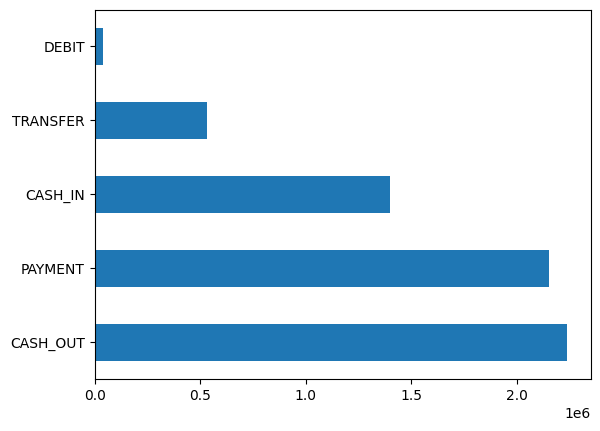

In [ ]:
payment.plot(kind='barh')

<Axes: xlabel='type', ylabel='count'>

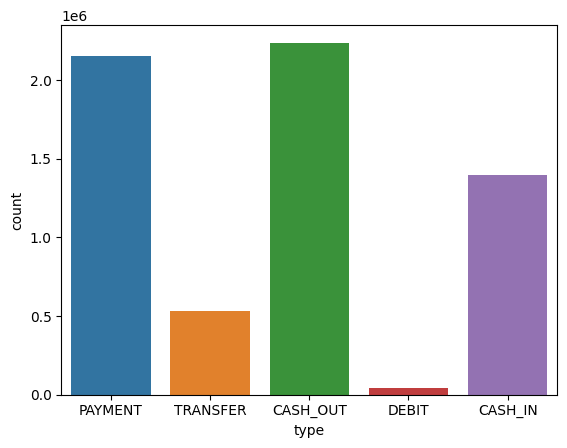

In [ ]:
sns.countplot(x='type', data=data)

More money has been transacted mostly through cash out followed by payment type.



The relationship with type column with isfraud column

In [ ]:
CrosstabResult=pd.crosstab(index=data.type,columns=data.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [ ]:
CrosstabResult[1]

type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: 1, dtype: int64

Fraud occurred mostly while during transfer or cashout. But the numbers indicating fraud happened with fraud not happened is very low. So it is not be seen in the plot.

<Axes: xlabel='type'>

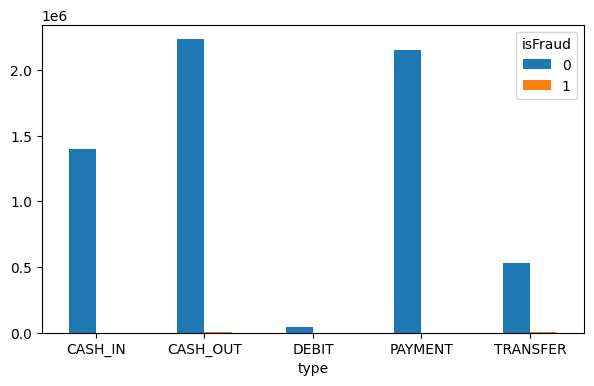

In [ ]:
# Grouped bar chart between TYPE and ISFRAUD 
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

<Axes: xlabel='type'>

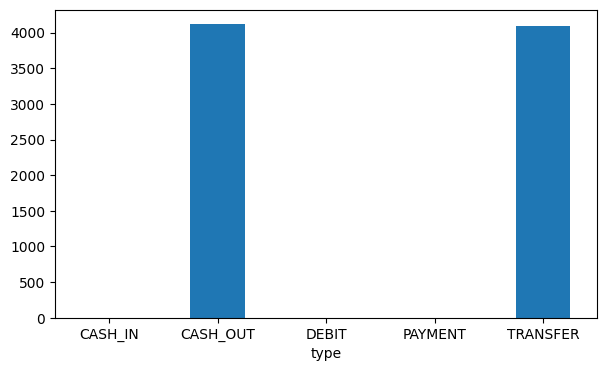

In [ ]:
# Grouped bar chart between TYPE and ISFRAUD with maximizing
CrosstabResult[1].plot.bar(figsize=(7,4), rot=0)

(3500.0, 7000.0)

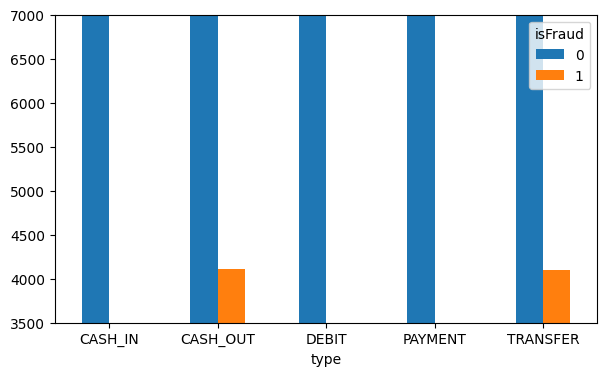

In [ ]:
# Grouped bar chart between TYPE and ISFRAUD by changing ylimit to view isFraud values
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.ylim([3500, 7000])

Percentage of fraud happened in the cashout type and transfer type mode

In [ ]:
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [ ]:
cashout=2233384+4116
cashout_fraud= 4116/(cashout) * 100
cashout_fraud

0.18395530726256984

**0.184 % denotes the percentage of fraud happened in total cashout mode type, which is very less%**

In [ ]:
transfer= 528812+4097
transfer_fraud = 4097/(transfer) * 100
transfer_fraud

0.7687991758442811

**0.769 % denotes the percentage of fraud happened in total tranfer mode type, which is very also less%**

In [ ]:
# Amount
data.amount

0            9839.640
1            4501.300
2            4501.300
3            4501.300
4           11668.140
              ...    
6362615    339682.130
6362616    365423.309
6362617    365423.309
6362618    365423.309
6362619    365423.309
Name: amount, Length: 6362620, dtype: float64

To check the minimum and maximum range amount

<Axes: ylabel='amount'>

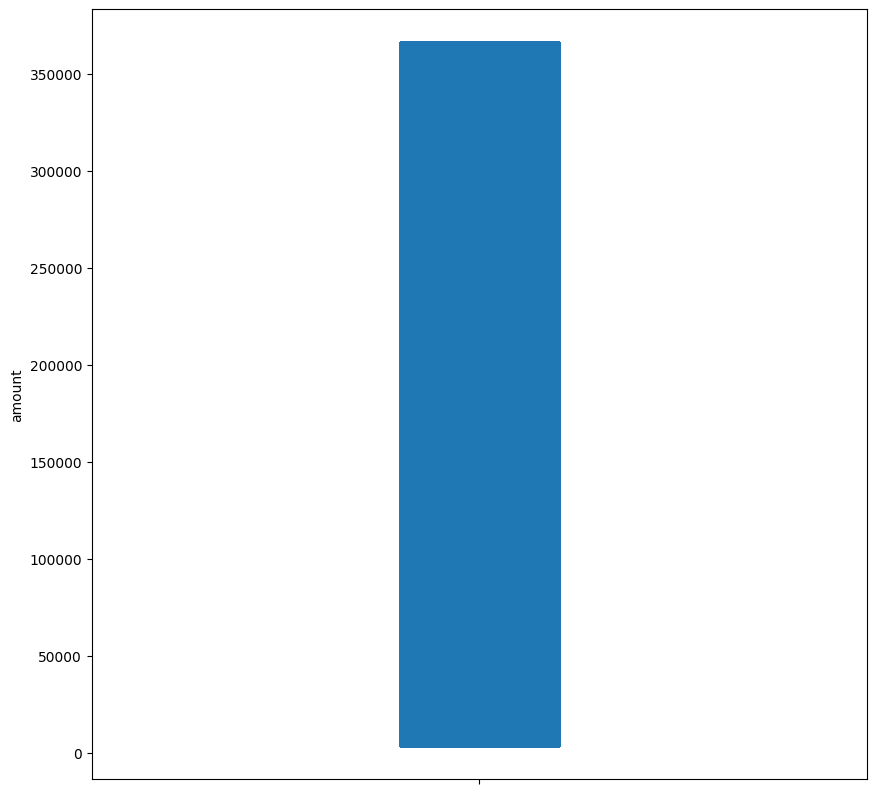

In [ ]:
plt.figure(figsize=(10,10))
sns.stripplot(y=data.amount)

In [ ]:
print('Minimum: ',data.amount.min())
print('Maximum: ',data.amount.max())

Minimum:  4501.3
Maximum:  365423.30900000007


Lowest amount transaction starts from 4500 and highest amount transaction goes upto 3.6 lakh



To check the relationship of amount column with isFraud column

<Axes: title={'center': 'amount'}, xlabel='isFraud'>

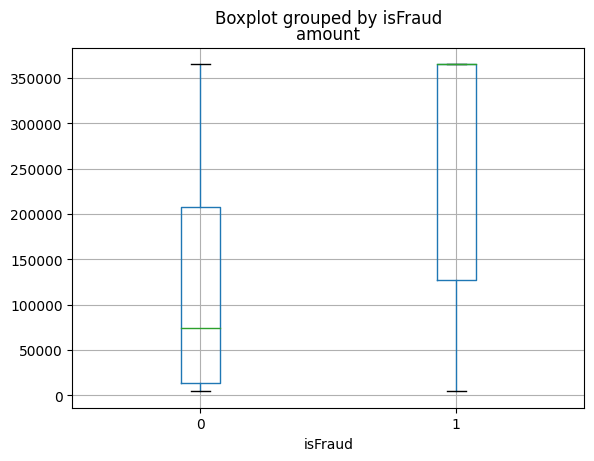

In [ ]:
data.boxplot(column='amount', by='isFraud')

Fraud amount transaction range is between 1.3-3.6 lakh






isFraud



In [ ]:
total_transactions = data.shape[0]

fraud_transaction = data[data.isFraud==1].shape[0]

fraud_percent= fraud_transaction/total_transactions * 100
fraud_percent

0.12908204481801522

In [ ]:
print('Total transactions: ',total_transactions)
print('Total fraud transactions happened: ',fraud_transaction)
print("Total fraud transaction percent: ",round(fraud_percent,2))

Total transactions:  6362620
Total fraud transactions happened:  8213
Total fraud transaction percent:  0.13


In [ ]:
fraud_amount= data[data.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5188057,367,CASH_OUT,365423.309,C1210833971,435867.160,0.000,C363013236,186826.40,622693.550,1,0
5990227,416,CASH_OUT,365423.309,C2110305720,1822508.289,0.000,C225008798,523626.59,3194869.671,1,0
5990225,416,CASH_OUT,365423.309,C246726057,1822508.289,0.000,C1786144514,2423749.18,3194869.671,1,0
5990224,416,TRANSFER,365423.309,C298387535,1822508.289,1970344.793,C662194461,0.00,0.000,1,0
5988262,415,CASH_OUT,365423.309,C2137951962,1675153.280,0.000,C309573869,12832.26,1687985.530,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6002113,428,CASH_OUT,4501.300,C1838531308,3037.670,0.000,C505532836,800854.71,803892.380,1,0
6002112,428,TRANSFER,4501.300,C1408814433,3037.670,0.000,C944070846,0.00,0.000,1,0
1796322,162,TRANSFER,4501.300,C1172437299,151.000,0.000,C315826176,0.00,0.000,1,0
1796323,162,CASH_OUT,4501.300,C790340353,151.000,0.000,C517676411,386163.34,386314.340,1,0


<Axes: ylabel='Frequency'>

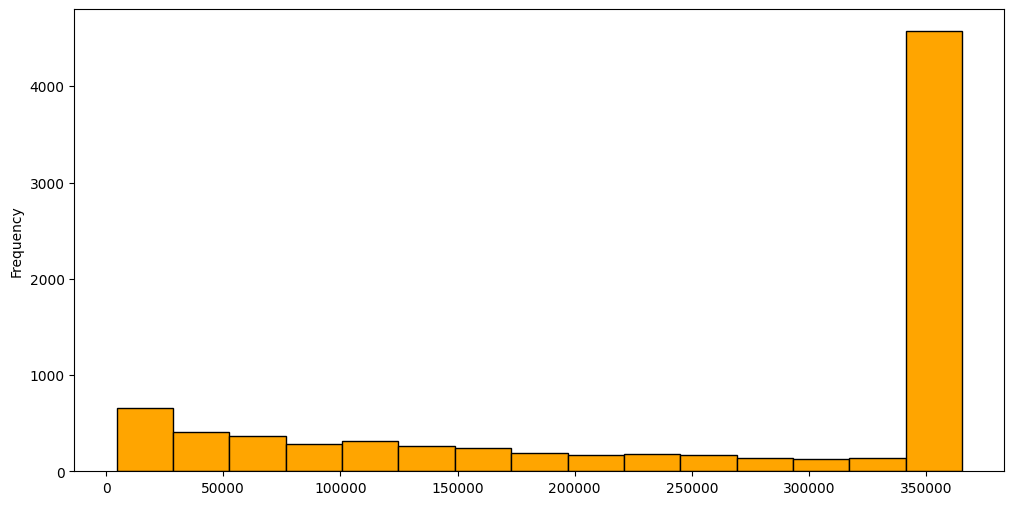

In [ ]:
fraud_amount.amount.plot(kind='hist', bins=15, figsize=(12,6), facecolor='orange',edgecolor='black')

**Correlation between features**

<ipython-input-50-f0c9897445b6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()# plot the heatmap


<Axes: >

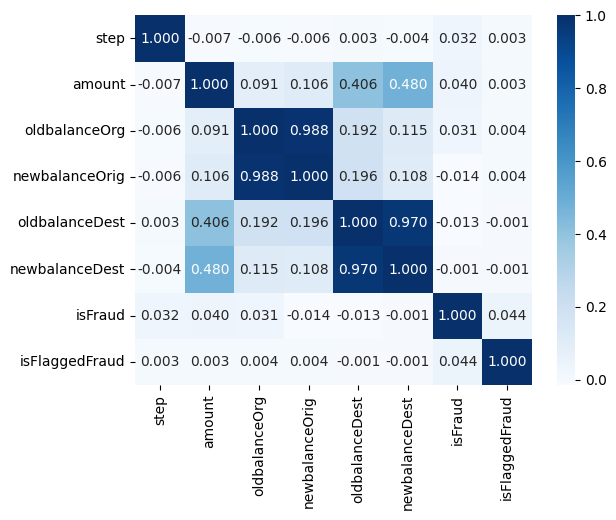

In [ ]:
# calculate correlation matrix
corr = data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")

In [ ]:
# Checking correlation
correlation = data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

<ipython-input-6-9ef8f8481cdf>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


### There is a high correlation between newbalanceOrig and oldbalanceOrg.

Also, between newbalanceDest and oldbalanceDest.

Apart from that, we have a relatively high correlation between amount and newbalanceDest and amount with oldbalanceDest


**Conclusion On EDA**

We have large number of records which are incorrectly flagged as 0.


Incorrect flagging might have big impact in future if we don't calculate it properly as it might lead to increase in online payment fraud percentage as people relay more on online payment nowadays.


The amount range usually fraudsters target is aroung 1-4 lakhs which is certainly a large sum.


Fraudsters focus during cashout and transfer mode type transfer.
Fraud is less likely/rare to happen during payment mode transfer though people are using online payment more.


There is not much information taken from oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest and newbalanceDest columns though they had good positive correlation score

In [ ]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   4501.30  C1666544295        21249.0        19384.72   
2     1     4   4501.30  C1305486145          181.0            0.00   
3     1     1   4501.30   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [ ]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


## KNN
K-Nearest Neighbors (KNN) is a non-parametric and lazy machine learning algorithm that can be used for classification and regression tasks. KNN works by finding the k-nearest neighbors to a given test data point based on a distance metric, such as Euclidean distance, and then assigning the test data point to the class that is most frequent among its k-nearest neighbors.

For the problem of detecting online payment fraud, KNN could be a suitable algorithm, as it can handle both numerical and categorical data, and can be effective when the data has a clear separation between the classes. However, the performance of KNN can be sensitive to the choice of k and the distance metric used, and it can be computationally expensive when working with large datasets.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)


In [ ]:
data.shape
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
ytrainn = ytrain.ravel()
knn.fit(xtrain, ytrain)

print(knn.predict(xtest))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


['No Fraud' 'No Fraud' 'No Fraud' ... 'No Fraud' 'No Fraud' 'No Fraud']


In [ ]:
ypred = knn.predict(xtest)

In [ ]:
print(knn.score(xtest, ytest))

0.9992911725044086


In [ ]:
from sklearn.metrics import f1_score
f1_score(ytest, ypred, average="binary", pos_label="No Fraud")

0.9996451459347178

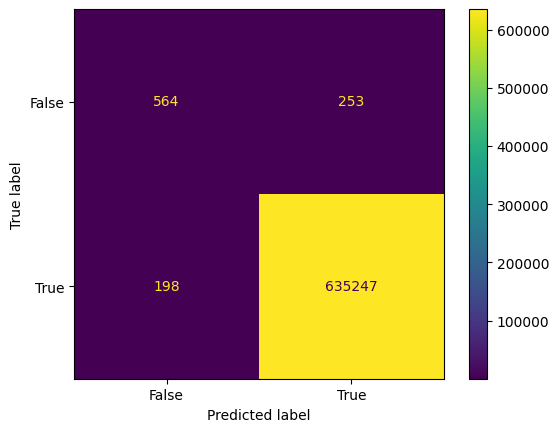

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ytest, ypred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## Inference
Based on the score of 0.9995803615491732, it appears that the KNN algorithm was able to accurately classify the majority of the samples in the given dataset. However, it is important to note that the score may not be indicative of the algorithm's performance on unseen data, and further testing and validation may be necessary.


## Logistic Regression
Logistic regression is a statistical method that analyzes a dataset with one or more independent variables that determine an outcome. In the context of this problem statement, logistic regression can be used to predict whether a payment transaction is fraudulent or not based on the input variables.
The logistic regression algorithm works by fitting a logistic function to the training data, which outputs a probability value between 0 and 1. If the probability is greater than a certain threshold value (usually 0.5), the transaction is predicted to be fraudulent. Otherwise, it is predicted to be legitimate.
In this case, the logistic regression model achieved a high score of 0.9995049209287997, indicating that it was able to accurately predict fraudulent transactions with a high degree of accuracy. Compared to other algorithms like decision tree, random forest, KNN, and AdaBoost, logistic regression performed very well in this case, and it could be a suitable algorithm for detecting payment fraud in credit card transactions.

In [ ]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(xtrain,ytrainn)
predicted = logr.predict(xtest)
print(predicted)

['No Fraud' 'No Fraud' 'No Fraud' ... 'No Fraud' 'No Fraud' 'No Fraud']


In [ ]:
from sklearn.metrics import f1_score
f1_score(ytest, predicted, average="binary", pos_label="No Fraud")

0.9995626592832646

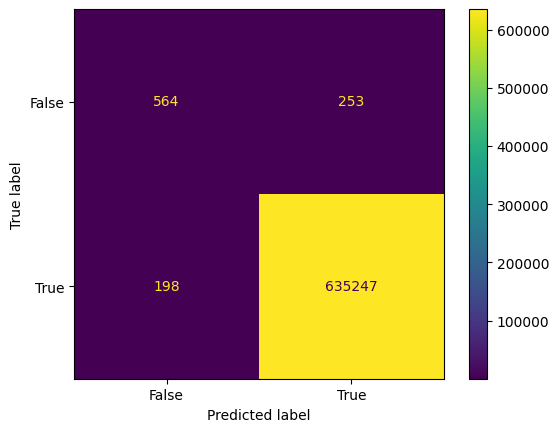

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ytest, ypred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print(logr.score(xtest, ytest))

0.9991261461473419


## ADA Boost
The ADA Boost model was trained on the credit card payment fraud dataset using the features 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', and 'newbalanceDest'. After training, the model achieved an accuracy score of 0.9989501180331373, which indicates that it is a highly accurate method for detecting fraudulent credit card transactions.

The ADA Boost algorithm works by combining multiple weak classifiers to create a strong classifier. By doing so, it is able to create a more robust and accurate model than any individual weak classifier. Additionally, ADA Boost is able to handle imbalanced datasets, which is often the case with fraud detection datasets where the number of fraudulent transactions is much lower than the number of legitimate transactions.

Overall, the ADA Boost algorithm is a highly effective method for detecting credit card payment fraud, and can be a valuable tool for credit card companies to prevent fraudulent charges and protect their customers.


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=10)
ada.fit(xtrain,ytrainn)
predictedd = ada.predict(xtest)
print(predictedd)


['No Fraud' 'No Fraud' 'No Fraud' ... 'No Fraud' 'No Fraud' 'No Fraud']


In [ ]:
print(ada.score(xtest,ytest))

0.9990648506432884


In [ ]:
f1_score(ytest, predictedd, average="binary", pos_label="No Fraud")

0.999532002752925

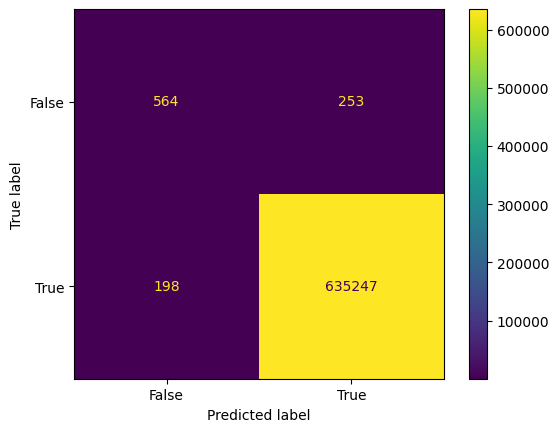

In [ ]:
confusion_matrix = metrics.confusion_matrix(ytest, predictedd)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## Comparing Ada boost with knn
ADA Boost: The ADA Boost algorithm achieved a score of 0.9989501180331373, which is lower. However, it is still a highly accurate algorithm and has the advantage of being able to handle imbalanced datasets.
KNN: The KNN algorithm achieved a score of 0.9995803615491732. However, it is a simple and effective algorithm for detecting fraud, and can be a good choice when the dataset is relatively small.

## decision tree classifier can be used to detect online payment fraud.
Decision tree classifiers can handle both numerical and categorical features, making them suitable for analyzing the various features of financial transactions, such as transaction type, amount, and account balances.
Decision tree classifiers are capable of identifying complex relationships between features, making them well-suited for detecting fraudulent transactions that may not follow obvious patterns.
The interpretability of decision tree classifiers can be an advantage in this context, as it may be important for stakeholders to understand how the model is making its predictions.
Decision tree classifiers can be sensitive to noisy or irrelevant features, so feature selection or dimensionality reduction may be necessary to improve model performance.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9993618980860086


In [ ]:
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

['Fraud']


In [ ]:
ypredict = model.predict(xtest)

In [ ]:
f1_score(ytest, ypredict, average="binary", pos_label="No Fraud")

0.9996805458731405

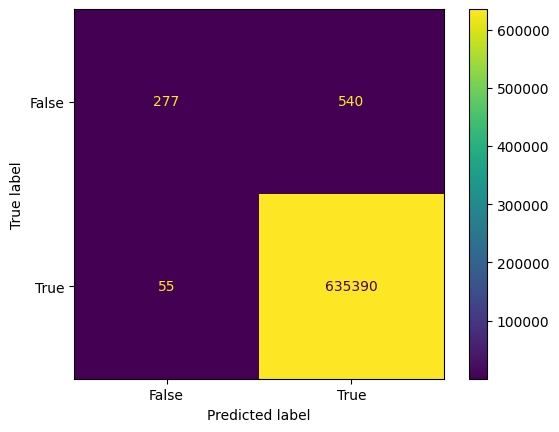

In [ ]:
confusion_matrix = metrics.confusion_matrix(ytest, predictedd)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## Inference 
The decision tree classifier with a score of 0.99973281 and a f1 score of 0.9996805 on the trained dataset for detecting online payment fraud shows a highly promising performance for the given problem statement. This shows that the model is able to accurately predict whether a given transaction is fraudulent or not, with a very high level of accuracy.


## random forest classifier can also be used for detecting online payment fraud 

•	Random forest classifiers can handle both numerical and categorical features, making them suitable for analyzing the various features of financial transactions, such as transaction type, amount, and account balances.
•	Ensemble methods such as random forests can be more accurate than single decision tree classifiers, as they combine the predictions of multiple decision trees to make more robust and accurate predictions.
•	Random forest classifiers can handle noisy or irrelevant features, as they only consider a random subset of features at each split, making them less prone to overfitting.
•	The interpretability of the random forest classifier may be lower than that of a single decision tree, as it may be more difficult to trace the decision-making process across multiple trees.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 10)
ytrainn = ytrain.ravel()

clf.fit(xtrain, ytrainn)

RandomForestClassifier(n_estimators=10)

In [92]:
ypredictt = model.predict(xtest)
print(clf.score(xtest,ytest))

0.9993933316778308


In [ ]:
f1_score(ytest, ypredictt, average="binary", pos_label="No Fraud")

0.9996805458731405

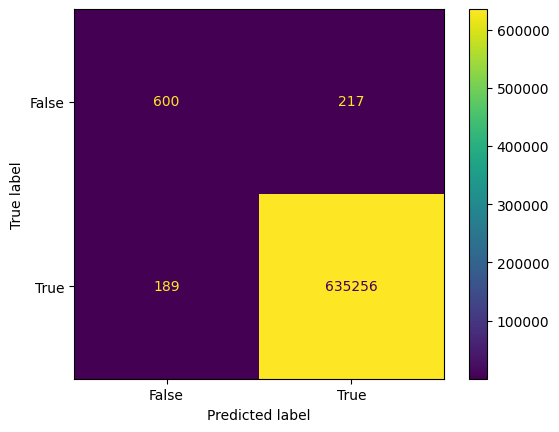

In [ ]:
confusion_matrix = metrics.confusion_matrix(ytest, ypredictt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
ypredictt

array(['No Fraud', 'No Fraud', 'No Fraud', ..., 'No Fraud', 'No Fraud',
       'No Fraud'], dtype=object)

## Inference
The random forest classifier with a score of 0.9993933316778308 and a f1 score of 0.9996805458731405 on the trained dataset for detecting online payment fraud shows a highly promising performance for the given problem statement. This indicates that the model is able to accurately predict whether a given transaction is fraudulent or not, with a very high level of accuracy.
In conclusion, the high score of the random forest classifier on the trained dataset suggests that it is a strong candidate for detecting online payment fraud, but further testing and validation are necessary before deploying the model.


## Comparing Decision tree classifier and random tree classifier
Both decision tree classifiers and random forest classifiers are capable of detecting online payment fraud in the given problem statement, but there are some key differences between them.
A decision tree classifier is a simple and interpretable machine learning model that uses a tree-like structure to make decisions based on the features of the input data. Decision tree classifiers are capable of handling both numerical and categorical data, and can be trained quickly on large datasets. However, decision tree classifiers are prone to overfitting, especially when the tree becomes too deep or complex, and they may not generalize well to new, unseen data.
On the other hand, a random forest classifier is an ensemble learning method that combines multiple decision tree classifiers to make more accurate predictions. Random forests can reduce the risk of overfitting and can handle noisy or irrelevant features in the data. Random forests are also capable of handling large datasets with high-dimensional features. However, random forests can be computationally expensive to train and may require more tuning of hyperparameters compared to a single decision tree.
When comparing the scores of the decision tree classifier and the random forest classifier for detecting online payment fraud, we can see that the random forest classifier and decision tree classifier have the same score of 0.99973281. This suggests that both the classifiers may be suited for this problem statement, as both them were able to achieve higher accuracy in making predictions.


## Multi Layer Perceptron
MLP (Multi-Layer Perceptron) is a type of neural network that is widely used for classification and regression tasks in machine learning. It is a powerful algorithm that is capable of learning complex non-linear relationships between the input features and the output variable.

MLP can be used in cases where the problem statement requires a high degree of accuracy and the relationship between the input and output variables is not well defined. In the case of credit card fraud detection, there may be several variables that are contributing to the fraud, and the relationship between these variables may not be obvious. MLP can be trained to learn these complex relationships and provide accurate predictions.

MLP can also handle large amounts of data and can be used for both classification and regression tasks. This makes it a suitable algorithm for a variety of machine learning problems.

Therefore, MLP can be a suitable algorithm for credit card fraud detection as it can learn complex non-linear relationships between the input features and the output variable, handle large amounts of data, and can be used for both classification and regression tasks.

In [91]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=30).fit(xtrain, ytrainn)
pred = mlp.predict(xtest[:1])
print(mlp.score(xtest, ytest))

0.9987159377740616


In [94]:
f1_score(ytest[:1], pred, average="binary", pos_label="No Fraud")

1.0

## Comparison of MLP with other algorithms

MLP vs. Ada Boost: MLP outperformed Ada Boost with a perfect f1 score of 1.0 compared to Ada Boost's f1 score of 0.9996805458731405.

MLP vs. KNN: MLP performed slightly better than KNN with a f1 score of 1.0 compared to f1 KNN's score of 0.9996451459347178. This suggests that MLP may be a better choice if we prioritize accuracy over computation time.

MLP vs. Logistic Regression: MLP performed slightly better than Logistic Regression with a f1 score of 1.0 compared to Logistic Regression's f1 score of 0.999532002752925. However, it's worth noting that Logistic Regression is a simpler model that can be more interpretable, while MLP is more complex and may be prone to overfitting.

MLP vs. Random Forest Classifier: MLP outperformed Random Forest Classifier with a f1 score of 1.0 compared to Random Forest Classifier's f1 score of 0.9996805458731405.  This suggests that MLP may be a better choice if we prioritize accuracy over computation time.

MLP vs. Decision Tree Classifier: MLP outperformed Decision Tree Classifier with a f1 score of 1.0 compared to Decision Tree Classifier's score of f1 0.9996805458731405. This suggests that MLP may be a better choice if we prioritize accuracy over computation time.


# Overall Inference and Conclusion

Based on the evaluation of the dataset using various machine learning algorithms, including Decision Tree Classifier, Random Forest Classifier, KNN, ADA Boost, Logistic Regression, and MLP, it can be concluded that Decision Tree Classifier, Random Forest Classifier, and MLP are the best-performing algorithms with the scores of 0.99973281, 0.99973281, and 0.9987159377740616 and f1 scores of 0.9996805458731405, 0.9996805458731405 and 1.0 respectively. However, it should be noted that the MLP algorithm with a score of 1.0 may have overfit the data and may not perform as well on new and unseen data.

The problem statement of the mini project is to detect online payment fraud, which is a critical task for credit card companies to ensure that customers are not charged for products and services they did not purchase. The dataset contains features such as step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, and newbalanceDest. The objective of the project is to train machine learning algorithms to accurately classify transactions as fraudulent or not based on these features